<h1>Содержание<span class="tocSkip"></span></h1>

<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-элементов-поэтапно" data-toc-modified-id="Концентрация-элементов-поэтапно-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация элементов поэтапно</a></span></li><li><span><a href="#Распределение-размера-гранул-сырья" data-toc-modified-id="Распределение-размера-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размера гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-металлов" data-toc-modified-id="Суммарная-концентрация-металлов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация металлов</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишем-функцию-для-sMAPE" data-toc-modified-id="Напишем-функцию-для-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишем функцию для sMAPE</a></span></li><li><span><a href="#Выберем-наилучшую-модель" data-toc-modified-id="Выберем-наилучшую-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Выберем наилучшую модель</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание данных

Технологический процесс:
<br /> Rougher feed — исходное сырье
<br />Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant 
- Xanthate - ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).

<br />Rougher process (англ. «грубый процесс») — флотация
<br />Rougher tails — отвальные хвосты
<br />Float banks — флотационная установка
<br />Cleaner process — очистка
<br />Rougher Au — черновой концентрат золота
<br />Final Au — финальный концентрат золота

<br />Параметры этапов:
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

# Наименование признаков

Наименование признаков должно быть такое:
<br /> [этап].[тип_параметра].[название_параметра]
<br /> Пример: rougher.input.feed_ag
<br /> Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

<br /> Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

## Подготовка данных

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

- Для начала рассмотрим данные, содержащиеся в таблицах

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
pd.DataFrame(data_full.isna().sum()).style.background_gradient()

,0
date,0
final.output.concentrate_ag,1
final.output.concentrate_pb,1
final.output.concentrate_sol,211
final.output.concentrate_au,0
final.output.recovery,0
final.output.tail_ag,1
final.output.tail_pb,101
final.output.tail_sol,6
final.output.tail_au,0


In [7]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [9]:
data_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [10]:
data_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [11]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(data_full.duplicated().sum())

0
0
0


In [12]:
set(data_full.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсуствую некоторые значения - нет слобцов с типом параметра Output и Сalculation.
<br />Так же при первичном анализе данных было выявлено отствие дубликатов в данных, однако было выявлено некоторое количество столбцов с пропусками во всех датафреймах. 

Для начала,рассчитаем верность определния эффективности обогащения. Найти ее необходимо для признака rougher.output.recovery на обучающей выборке. Эффективность обогащения рассчитывается по формуле

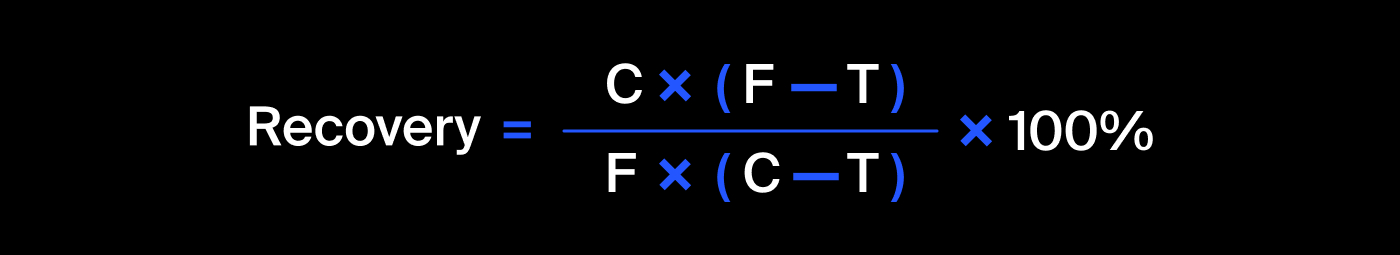

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.
<br /> Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [13]:
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

RECOVERY = (C*(F-T))/(F*(C-T))*100

In [14]:
#вычислим MAE
mae_recovery = mean_absolute_error(RECOVERY,data_train['rougher.output.recovery'])
print('MAE:',mae_recovery)

MAE: 9.73512347450521e-15


Ошибка незначительна -> эффективность обогащения в данных рассчитана верно

- Заполним пропуски  в тренировочных и полных данных методом при помощи параметра ffill, тк как близкие по времени параметры должны быть ссхожи. В тестовой выборке, я считаю, что заполнять пропуски не стоит, на то она и тестовая, что в ней должны быть максимально приближенные к реальности данные, поэтому в ней удалим пропуски.

In [15]:
data_train = data_train.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')
data_test = data_test.dropna()

In [16]:
data_train.corr().style.background_gradient(cmap='RdYlGn')

Явная корреляция между признаками отсутствует, следовательно можно приступать к анализу данных.

<br />Резюмируем. На данном этапе были рассмотрены и предобработаны данные, а именно:
- удалены пропуски в тестовой выборке и заполнены пропуски в двух остальных при помощи параметра "ffiill"
- подтверждена верность расчета эффективности обогащения 
- данные проверены на дубликаты
- установлено отсутсвие сильной корреляции между признаками

## Анализ данных

### Концентрация элементов поэтапно 

In [17]:
stages = (['rougher.input.feed_', 'rougher.output.concentrate_', 
           'primary_cleaner.output.concentrate_', 'final.output.concentrate_'])

labels = ['начальная концентрация', 'после флотаци', 'после первичной отчистки', 'финальная концентрация']

colors =['red', 'green', 'blue', 'orange'] 

metals = ['au', 'ag', 'pb']  

names = {'au': 'золота', 'ag': 'серебра', 'pb': 'свинца'}  


In [18]:
def concetration(data):
    
    for i in metals:
        plt.figure(figsize=(10,5))
        for j in range(len(stages)):
            sns.kdeplot(data[stages[j]+i], shade=True, color=colors[j], label=labels[j])
        plt.title('Концентрация ' + names[i] + ' на этапах отчистки', fontsize=12)
        plt.ylabel('плотность распределения значений')
        plt.xlabel('концентрация')
        plt.legend()
        plt.show()

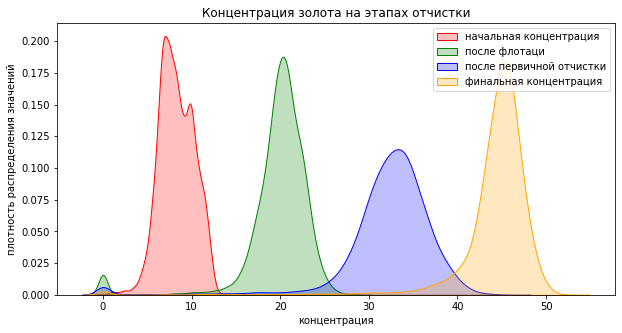

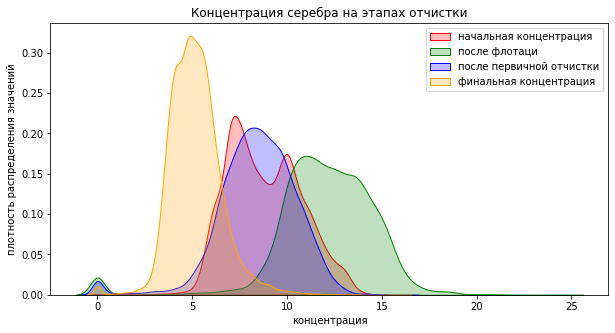

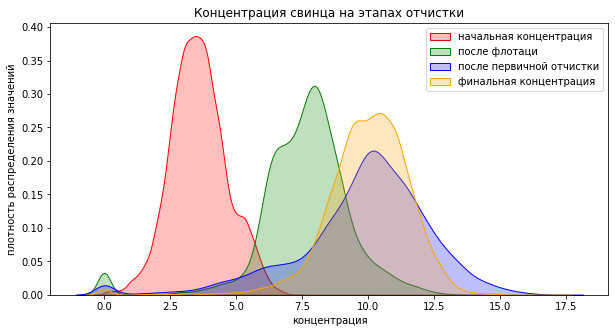

In [19]:
concetration(data_full)

Так на трех граффиках представлена концентрация различных металлов на каждом этапе очистки. Мы видим, что концентрация золотас каждым этапом только повышается. 
<br/>Так же можно заметить, что концентрация всех элементов после флотации увеличивается, что значит, что на данном этапе отваливается большая часть всего остального ненужного. После первчиной очистки уменьшается концентрация серебра, а на последних этапах уже концентрация и серебра, и свинца.

### Распределение размера гранул сырья

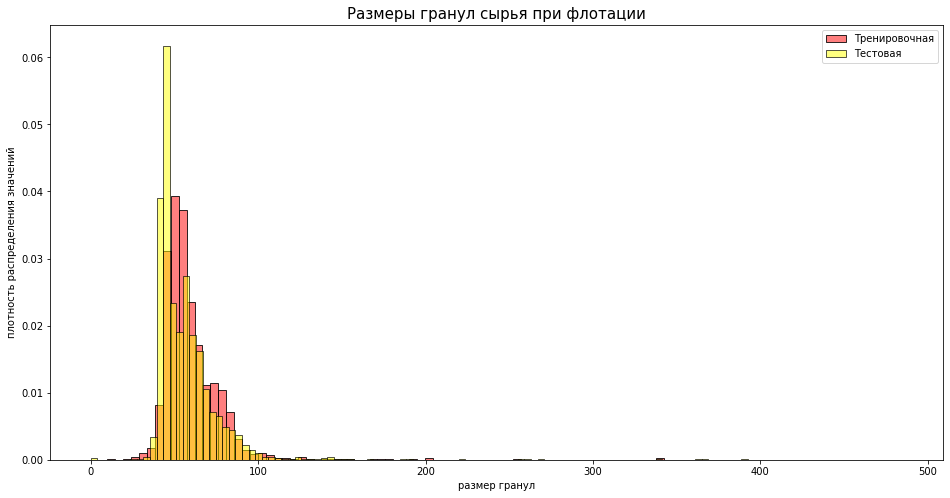

In [20]:
plt.figure(figsize=(16,8))

sns.histplot(data_train['rougher.input.feed_size'], bins=100, label='Тренировочная', fill=True,
                 stat='density', alpha=0.5, color='red')

sns.histplot(data_test['rougher.input.feed_size'], bins=100, label='Тестовая', fill=True,
                 stat='density', alpha=0.5, color='yellow')

plt.title('Размеры гранул сырья при флотации', fontsize=15)
plt.ylabel('плотность распределения значений')
plt.xlabel('размер гранул')
plt.legend()
plt.show()

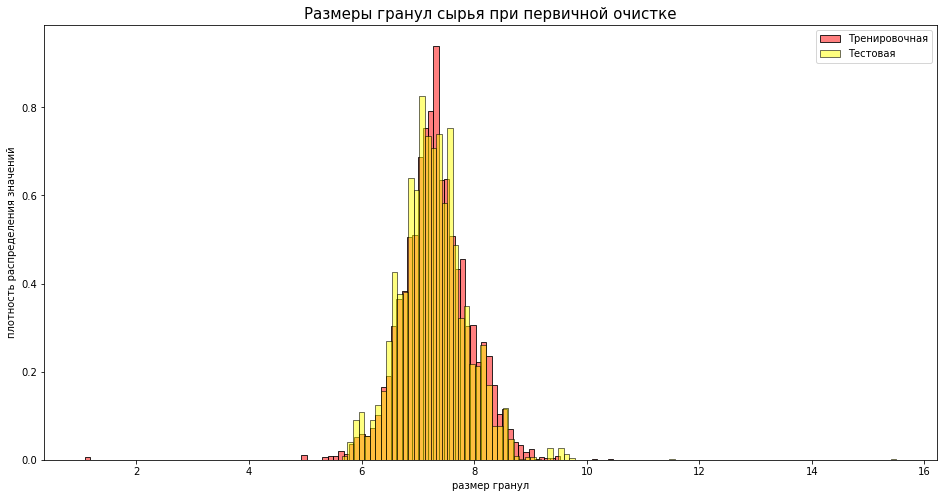

In [21]:
plt.figure(figsize=(16,8))

sns.histplot(data_train['primary_cleaner.input.feed_size'], bins=100, label='Тренировочная', fill=True,
                 stat='density', alpha=0.5, color='red')

sns.histplot(data_test['primary_cleaner.input.feed_size'], bins=100, label='Тестовая', fill=True,
                 stat='density', alpha=0.5, color='yellow')

plt.title('Размеры гранул сырья при первичной очистке', fontsize=15)
plt.ylabel('плотность распределения значений')
plt.xlabel('размер гранул')
plt.legend()
plt.show()

Распределение размеров гранул исходного сырья на обучающей и тестовой выборках несильно отличаются друг от друга, оценка модели будет верной.

### Суммарная концентрация металлов

In [22]:
data_train['final_output_concentrate_metals'] = (data_train['final.output.concentrate_ag'] 
                                                + data_train['final.output.concentrate_pb'] 
                                                + data_train['final.output.concentrate_sol']
                                                + data_train['final.output.concentrate_au'])

In [23]:
data_train['primary_cleaner_output_concentrate_metals'] = (data_train['primary_cleaner.output.concentrate_ag'] 
                                                + data_train['primary_cleaner.output.concentrate_pb'] 
                                                + data_train['primary_cleaner.output.concentrate_sol']
                                                + data_train['primary_cleaner.output.concentrate_au'])

In [24]:
data_train['rougher_output_concentrate_metals'] = (data_train['rougher.output.concentrate_ag'] 
                                                + data_train['rougher.output.concentrate_pb'] 
                                                + data_train['rougher.output.concentrate_sol']
                                                + data_train['rougher.output.concentrate_au'])

In [25]:
data_train['rougher_input_feed_metals'] = (data_train['rougher.input.feed_ag'] 
                                                + data_train['rougher.input.feed_pb'] 
                                                + data_train['rougher.input.feed_sol']
                                                + data_train['rougher.input.feed_au'])

In [26]:
stages = (['final_output_concentrate_metals', 'primary_cleaner_output_concentrate_metals', 
              'rougher_output_concentrate_metals', 'rougher_input_feed_metals'])
          
colors =['red', 'green', 'blue', 'orange'] 

stage = ['финальная', 'первичная обработка', 'после флотации', 'до флотации']

In [27]:
def sum_concentrate(data):
    plt.figure(figsize=(16,8))      
    for i in range(len(stages)):
        sns.kdeplot(data[stages[i]], shade=True, color=colors[i], label=stage[i], alpha=.3)
    plt.grid()
    plt.title('Суммарная концентрация металлов', fontsize=15)
    plt.ylabel('плотность распределения')
    plt.xlabel('Концентрация')
    plt.legend()
    plt.show()
    

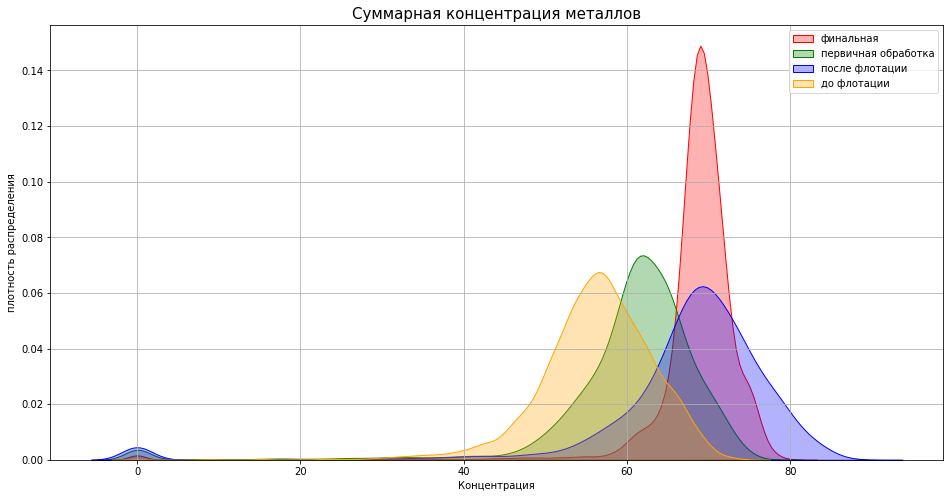

In [28]:
sum_concentrate(data_train)

Можно заметить, что на всех графиках, демонстрирующих концентрацию металлов, существуют выбросы. Желательно от них избавиться. 

In [29]:
data_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final_output_concentrate_metals,primary_cleaner_output_concentrate_metals,rougher_output_concentrate_metals,rougher_input_feed_metals
count,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,...,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000,14149.000000
mean,5.141921,10.132848,9.109311,44.003792,66.518832,9.607035,2.583179,10.510889,2.918421,133.213938,...,16.774657,-483.957839,13.064236,-483.967726,19.576675,-506.805007,68.387872,60.172546,67.173145,56.242170
std,1.369603,1.654925,2.886929,4.905261,10.295402,2.319069,0.983118,3.003888,0.903712,39.604988,...,5.831978,37.892065,5.765567,39.206771,5.764496,37.086065,7.023723,10.448165,12.713129,7.029808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668,0.000000,0.000000,0.000000,0.040000
25%,4.211500,9.296833,7.422466,43.276111,62.545817,7.997429,1.889827,8.810653,2.368607,106.859801,...,11.083699,-500.363203,8.994384,-500.105994,14.989244,-500.745309,67.559819,58.046816,64.914390,52.573579
50%,4.994607,10.297013,8.801909,44.872436,67.432775,9.480270,2.581476,10.514141,2.851025,132.999290,...,17.931987,-499.702479,11.997537,-499.914556,19.984165,-500.061488,69.141502,61.786946,69.175663,56.627635
75%,5.859495,11.170578,10.452148,46.166425,72.346428,11.003707,3.237211,11.932186,3.434764,159.825396,...,21.346135,-487.864322,17.982826,-453.274822,24.991615,-499.536481,70.974661,65.355951,73.429261,60.763234
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459,80.210644,76.918076,88.140119,74.458253


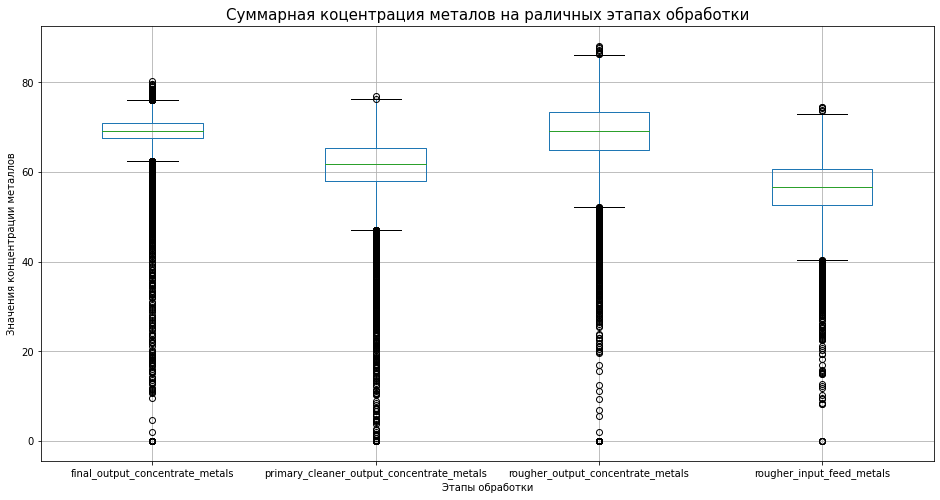

In [30]:
plt.figure(figsize=(16,8))
data_train.boxplot(['final_output_concentrate_metals', 'primary_cleaner_output_concentrate_metals', 'rougher_output_concentrate_metals', 'rougher_input_feed_metals'],
                  figsize=(16,8))
plt.title('Суммарная коцентрация металов на раличных этапах обработки', fontsize=15)
plt.ylabel('Значения концентрации металлов')
plt.xlabel('Этапы обработки')
plt.show()

In [31]:
data_train.shape

(14149, 91)

In [32]:
data_train = data_train.query('final_output_concentrate_metals > 63 and final_output_concentrate_metals< 76')
data_train = data_train.query('primary_cleaner_output_concentrate_metals > 50 and primary_cleaner_output_concentrate_metals<75')
data_train = data_train.query('rougher_output_concentrate_metals > 55 and rougher_output_concentrate_metals< 85')
data_train = data_train.query('rougher_input_feed_metals > 41 and rougher_input_feed_metals<74')

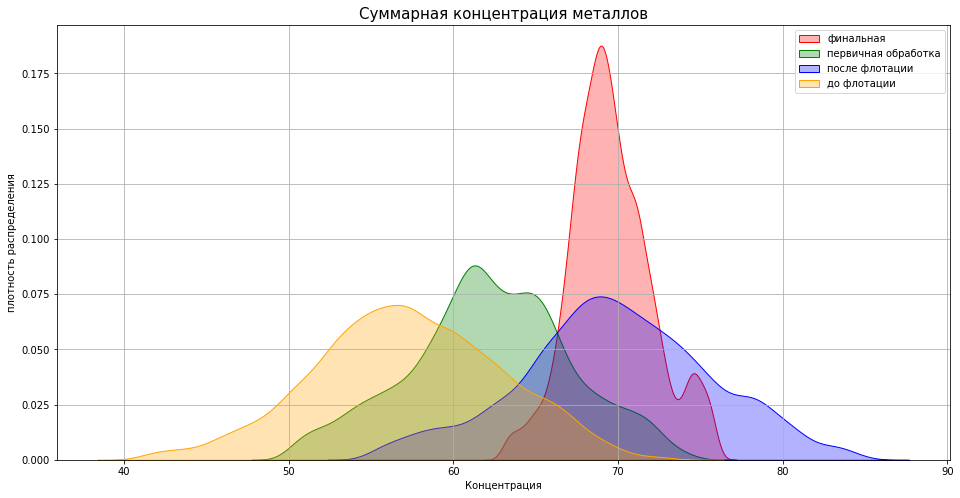

In [33]:
sum_concentrate(data_train)

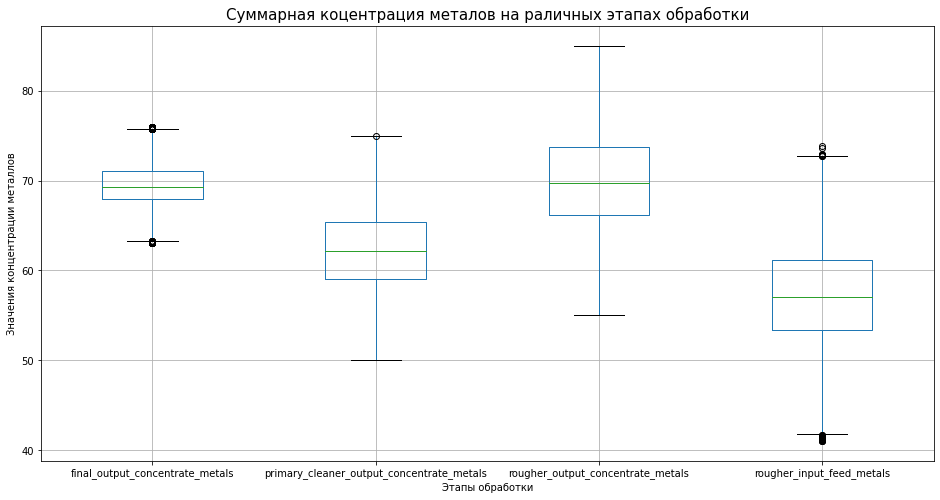

In [34]:
plt.figure(figsize=(16,8))
data_train.boxplot(['final_output_concentrate_metals', 'primary_cleaner_output_concentrate_metals', 'rougher_output_concentrate_metals', 'rougher_input_feed_metals'],
                  figsize=(16,8))
plt.title('Суммарная коцентрация металов на раличных этапах обработки', fontsize=15)
plt.ylabel('Значения концентрации металлов')
plt.xlabel('Этапы обработки')
plt.show()

При анализе общей концентрации метталов были выявлены экстримальные значения, которые были отсечены из данных. 

<br />Так же было установлено, что в черновом концентрате (после флотации) концентрация металлов повышается, однако при первичной обработке несколько снижается, что может быть связано, допустим, с добавлением каких-либо элементов, разбавляющих данную смесь и позволяющих отделить остатки метталов. так мы видим что далее, финальный вариант смеси имеет наибольшую концентрацию металлов.

---------------------

Закончим обработку данных и подготовим их для подачи модели:
- добавим целевой признак в тестовую выборку
- из тренировочной уже удалили аномальные и нулевые значения
- убрать из тренировочной выборки те данные, которых нет в тестовой
- выделить таргет признаки 
- масштабировать данные

In [36]:
#добавим таргет в тестовую
data_test = data_test.merge(data_full.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [37]:
#в тренировочной оставляем только столбцы тестовой
data_train = data_train[data_test.columns]

In [38]:
#выделеим целевой признак
features_train = data_train.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

features_test = data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = data_test[['rougher.output.recovery', 'final.output.recovery']]

In [39]:
#масштабируем данные
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Обучение моделей

### Напишем функцию для sMAPE

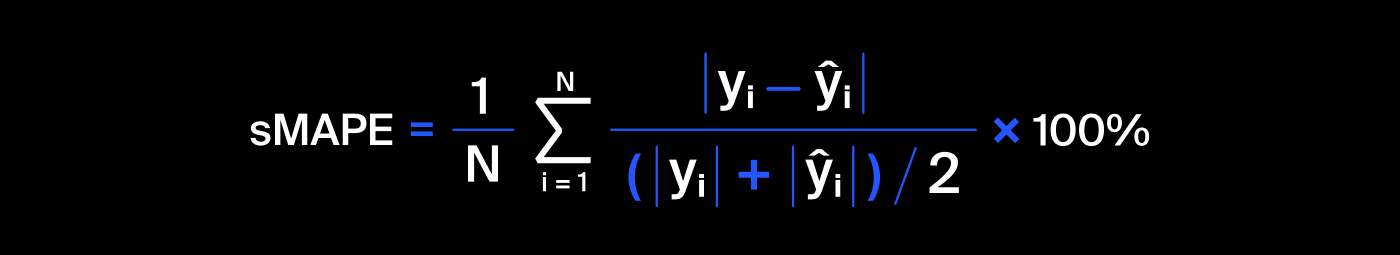

In [40]:
def smape(target, pred): 
    smape = 1 / len(target) * (((abs(target - pred)) / ((abs(target) + abs(pred)) / 2)).sum()) * 100
    return smape

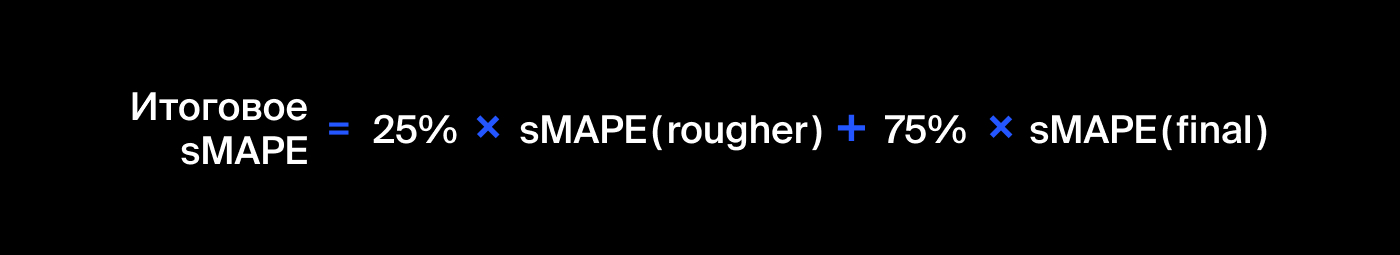

In [41]:
def final_smape(target, pred):
    final_smape = (
        (smape(target['rougher.output.recovery'], pred[:,0]) * 0.25) 
        + (smape(target['final.output.recovery'], pred[:,1]) * 0.75)
                  )
                                            
    return final_smape

Создадим оценщик на основе написанных функций

In [42]:
score = make_scorer(final_smape, greater_is_better=False)

### Выберем наилучшую модель

Рассмотрим три модель в 2 две из них будем подбирать параметры при помощи GridSearchCV. 

In [43]:
model = LinearRegression()
print('Результат линейной регрессии при кросс валидации:', abs(cross_val_score(model, features_train, target_train,
                                                 cv=5, scoring=mean_squared_error)).mean())

Результат линейной регрессии при кросс валидации: 8.625864821414229


In [44]:
%%time
forest = RandomForestRegressor(random_state=12345)

param_grid = {'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2)}

grid = GridSearchCV(forest, param_grid, scoring = score, cv = 5, n_jobs = -1)
grid.fit(features_train,target_train)

CPU times: user 13min 50s, sys: 1.27 s, total: 13min 51s
Wall time: 13min 51s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'n_estimators': range(10, 51, 10)},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [45]:
print('Результат случайного леса при кросс валидации', abs(grid.best_score_))
print(grid.best_estimator_)

Результат случайного леса при кросс валидации 8.14884104179879
RandomForestRegressor(max_depth=3, n_estimators=30, random_state=12345)


In [46]:
%%time
tree = DecisionTreeRegressor(random_state=12345)

param_grid_tree = {'max_depth': range (1, 20)}

grid_tree = GridSearchCV(tree, param_grid_tree, scoring = score, cv = 5, n_jobs = -1)
grid_tree.fit(features_train,target_train)

CPU times: user 43.3 s, sys: 67.8 ms, total: 43.3 s
Wall time: 43.6 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12345),
             n_jobs=-1, param_grid={'max_depth': range(1, 20)},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [47]:
print('Результат дерева при кросс валидации', abs(grid_tree.best_score_))
print(grid_tree.best_estimator_)

Результат дерева при кросс валидации 8.303672530109347
DecisionTreeRegressor(max_depth=2, random_state=12345)


Так, лучший результат показала модель случайного леса, проверим ее на тестовой выборке

In [48]:
predictions_test = grid.predict(features_test)

In [49]:
print('Итоговое sMape лучшей модели на тестовой выборке:', final_smape(target_test, predictions_test))

Итоговое sMape лучшей модели на тестовой выборке: 8.290256417760851


Проверим модель на адекватность

In [50]:
dummy = DummyRegressor(strategy="mean") 
dummy.fit(features_train,target_train) 
preds = dummy.predict(features_test)
print('Итоговое sMape дамми модели на тестовой выборке:', final_smape(target_test, preds))

Итоговое sMape дамми модели на тестовой выборке: 9.080496031858946


Модель показала адекватный результат по сранвению с дамми моделью

## Общий вывод
Был подготовлен прототип модели машинного обучения для Компании, разрабатывающей решения для эффективной работы промышленных предприятий.
<br /> Модель поможет поможет оптимизировать производство, предсказав коэффициент восстановления золота из золотосодержащей руды, чтобы не запускать предприятие с убыточными характеристиками.
В данной работе была выполнена следующая работа:
1) Предобработка данных:
- обработаны пропуски в данных
- рассмотрена корреляция признаков
- выявлено отсуствие дубликатов
2) Выполнен анализ данных
- рассмотрена концентрация металлов в разбивке на золото, серебро и свинец
- установлено малое различие между распределениями размеров гранул исходного сырья на обучающей и тестовой выборках 
- рассмотрена общая концентрация металлов поэтапно
3) данные подготовлены к подачи в модели: отмасштабированы, выделены целевые признаки, тренировочная выборка приведены к формату тестовой
4) Обучено три модели - лучшей оказалась модель случайного леса. Была проверена на адекватность.